Import des différentes modules (bibliothèque)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Importer l'ensemble de données (Datasets)

In [4]:
# Charger l'ensemble de donnée
df = pd.read_csv("C:/Users/Sarah/Desktop/Auto formation machine learning/data.csv")

In [5]:
# Voir les différentes caractéristique de notre ensemble de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
# Voir les 5 premiers éléments de notre ensemble de données
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
# Visualiser les 5 derniers éléments de la dataset
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [8]:
# Visualisation combiné des 5 premiers et 5 derniers éléments 
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [9]:
# Résumé statistique des données
df.describe ()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


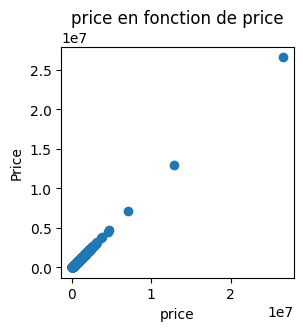

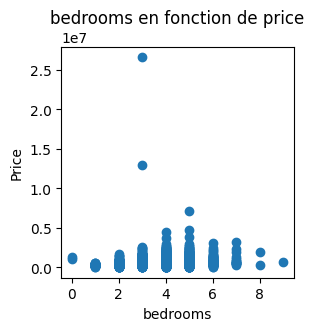

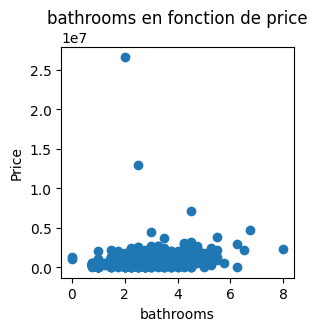

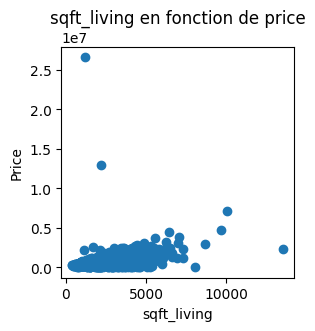

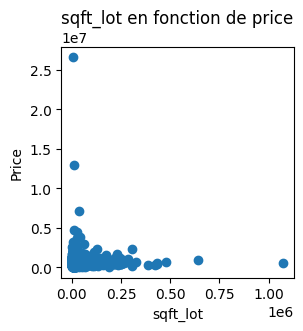

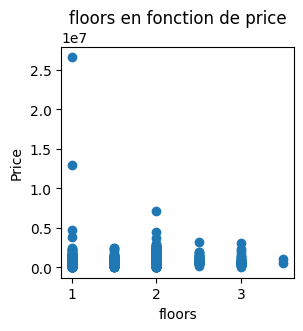

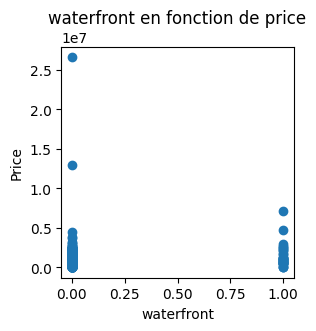

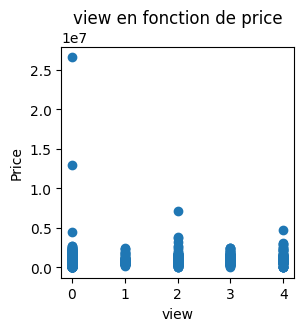

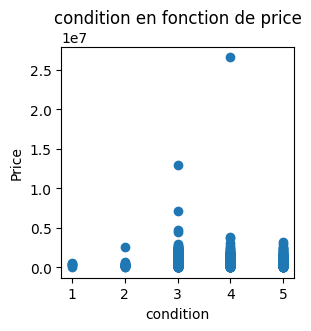

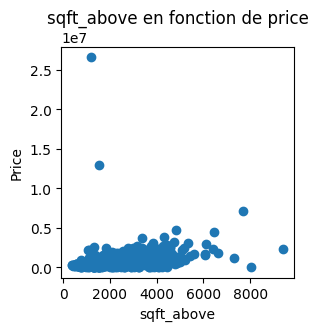

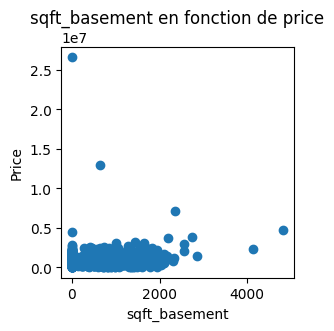

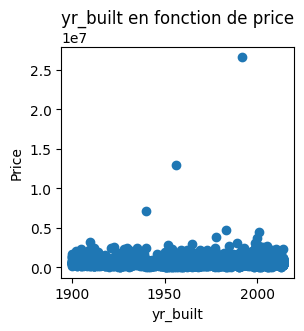

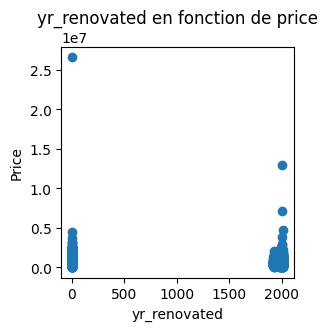

In [10]:
for features in df.columns:
    if df[features].dtype != 'object':
        plt.figure(figsize=(3,3))
        plt.scatter(df[features], df['price'])
        plt.xlabel(features)
        plt.ylabel("Price")
        plt.title(f"{features} en fonction de price")
        plt.show()

In [11]:
print(df.dtypes)


date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


In [12]:
# Exclure les colonnes de type datetime
df_numeric = df.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation sur les colonnes numériques uniquement
matrix_correlation = df_numeric.corr()

# Afficher la matrice de corrélation
print(matrix_correlation)

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.1

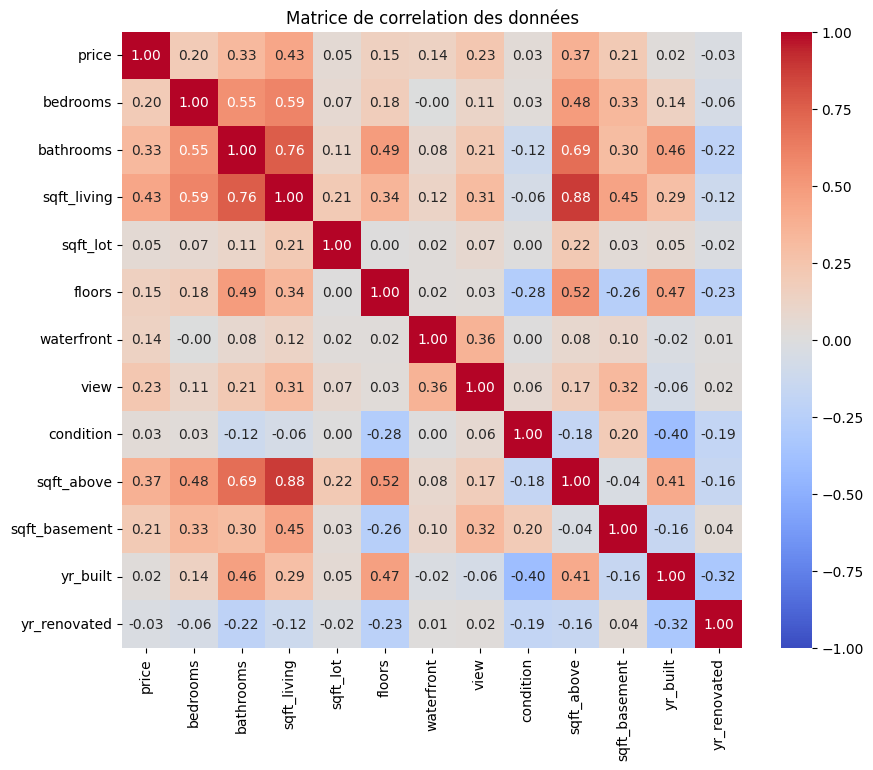

In [14]:
# Faire une figure de la matrice de correlation avec seaborn
plt.figure(figsize=(10,8))
sns.heatmap(matrix_correlation, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Matrice de correlation des données")
plt.show()

Extraction des données

In [2]:
# Extraire le sqft_living sous forme d'un tableau à 2 dimensions
X = df[['sqft_living']].values

NameError: name 'df' is not defined

In [16]:
X.shape

(4600, 1)

In [17]:
y = df['price']

In [18]:
y.shape

(4600,)

In [19]:
# Séparation des données en données d'entrainement et de test
# test_size spécifie le nombre de donnée qu'on souhaiterais avoir pour 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Importer le modèle de la bibliothèque
from sklearn.linear_model import LinearRegression

# Définir le modèle
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Afficher les coefficients du modèle
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [267.22365824]
Intercept: -26048.209395430167


In [24]:
y_pred = model.predict(X_test)

In [56]:
# Evaluer la performance du modèle
mse = mean_squared_error(y_test, y_pred)
mse

np.float64(990204087727.1417)

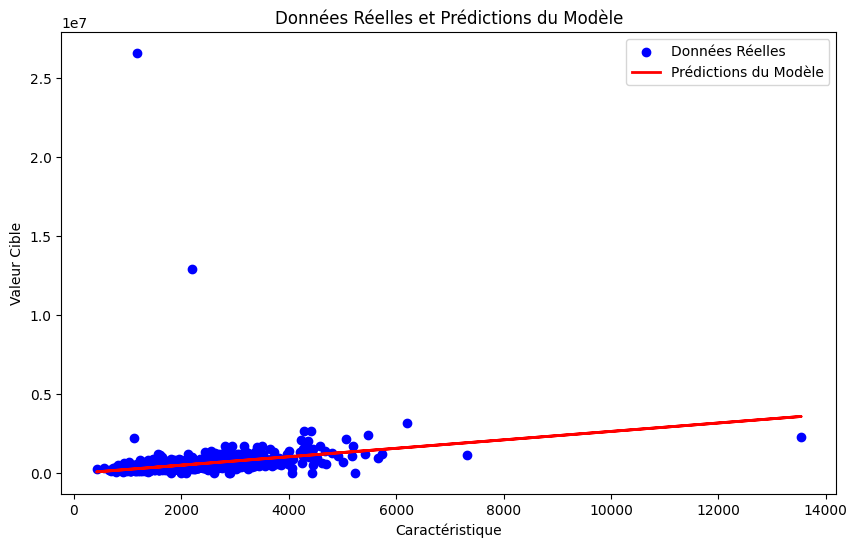

In [27]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))

# Tracer les données réelles
plt.scatter(X_test, y_test, color='blue', label='Données Réelles')

# Tracer les prédictions du modèle
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Prédictions du Modèle')

# Ajouter des labels et un titre
plt.xlabel('Caractéristique')
plt.ylabel('Valeur Cible')
plt.title('Données Réelles et Prédictions du Modèle')
plt.legend()

# Afficher le graphique
plt.show()

In [29]:
y_pred_test = model.predict(np.array([[8000]]))
y_pred_test

array([2111741.05650319])

Regression linéaire multiple

    Cas de deux variables

In [31]:
# Extraction des données (features)
X_mul = df[["sqft_living", "bedrooms"]].values

In [32]:
X_mul

array([[1.34e+03, 3.00e+00],
       [3.65e+03, 5.00e+00],
       [1.93e+03, 3.00e+00],
       ...,
       [3.01e+03, 3.00e+00],
       [2.09e+03, 4.00e+00],
       [1.49e+03, 3.00e+00]])

In [33]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [34]:
# Séparation des données en données d'entrainement et de test
# test_size spécifie le nombre de donnée qu'on souhaiterais avoir pour le test
X_mul_train, X_mul_test, y_mul_train, y_mul_test = train_test_split(X_mul, y, test_size=0.1, random_state=42)

In [35]:
# Définir le modèle
model = LinearRegression()

In [36]:
# Entrainement du modèle
model.fit(X_mul_train, y_mul_train)

LinearRegression()

In [37]:
# Prédiction sur les données de test
y_mul_pred = model.predict(X_mul_test)

In [38]:
y_mul_pred

array([ 381324.54575592,  425738.97247228,  803988.77532623,
        592656.66054107,  455576.36986962,  714818.25251386,
        514909.49528465,  506341.97711769,  500630.29833971,
        512053.65589566,  774790.87968262,  290577.18706201,
        829051.8280734 ,  509197.81650668,  418450.45781277,
        636431.58550371,  677692.340457  ,  729736.95121253,
        935357.38721971,  957564.60057789,  766862.86326938,
        689115.69801296,  638350.09076489,  483495.26200578,
        256307.11439414,  242027.9174492 ,  712601.9148786 ,
        811916.79173947,  401954.92323256,  689755.19976669,
       1518246.45494747,  367684.8505647 , 1243148.53947675,
        511414.15414194,  229325.55638579,  462864.88452913,
        869033.57951924,  801430.76831132,  307072.72164221,
        618359.21504197,  444153.01231366,  392747.90331187,
        489206.94078376,  432090.15300398,  324207.75797614,
        338486.95492109,  512693.15764939,  462864.88452913,
        757016.34159496,

In [39]:
y_mul_test

3683     544000.0
4411          0.0
2584    1712500.0
69       365000.0
1844     275000.0
          ...    
3692     383962.0
838      445000.0
999      555000.0
70       331950.0
203      530000.0
Name: price, Length: 460, dtype: float64

In [40]:
r2_mul = r2_score(y_mul_test, y_mul_pred)
r2_mul

0.4618776264945823

In [41]:
# Afficher les coefficients du modèle
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [   285.5839389  -54900.45014451]
Intercept: 129073.34539710893


Exercice 

1- Construction d'un modèle de regression multiple linéaire en fonction de 3 variables

In [44]:
# Extraction des données (features)
X_exer = df[["sqft_above", "view", "bedrooms"]].values

In [45]:
X_exer

array([[1.34e+03, 0.00e+00, 3.00e+00],
       [3.37e+03, 4.00e+00, 5.00e+00],
       [1.93e+03, 0.00e+00, 3.00e+00],
       ...,
       [3.01e+03, 0.00e+00, 3.00e+00],
       [1.07e+03, 0.00e+00, 4.00e+00],
       [1.49e+03, 0.00e+00, 3.00e+00]])

In [46]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [58]:
# Séparation des données en données d'entrainement et de test
# test_size spécifie le nombre de donnée qu'on souhaiterais avoir pour le test
X_exer_train, X_exer_test, y_exer_train, y_exer_test = train_test_split(X_exer, y, test_size=0.1, random_state=42)

In [59]:
# Définir le modèle
model = LinearRegression()

In [60]:
# Entrainement du modèle
model.fit(X_exer_train, y_exer_train)

LinearRegression()

In [61]:
# Prédiction sur les données de test
y_exer_pred = model.predict(X_exer_test)

In [62]:
y_exer_pred 

array([ 380661.523158  ,  437356.89575337, 1015522.55272784,
        464233.62876834,  342089.78210707,  747583.38090273,
        370437.46840476,  591153.54219618,  586867.79319052,
        595439.29120184,  792583.74546214,  537695.45342615,
        833298.3610159 ,  368294.59390193,  468519.377774  ,
       1166994.72120861,  719726.01236595,  702092.69858241,
        761044.71948131,  929727.71364322, 1216428.52340365,
        728297.51037726,  419233.26420893,  574010.54617355,
        290170.47627826,  279456.10376411,  689235.45156543,
        820441.11399893,  399457.07592256,  835521.09449018,
       1453011.58043599,  296599.09978675, 1144015.16392616,
        651644.34603631,  383294.71542173,  437356.89575337,
        863298.60405551, 1104247.26906496,  384947.27216366,
        618520.59297206,  487805.24829947,  449233.50724854,
        578296.29517921,  406866.33495286,  397804.51918063,
        408518.89169478,  451376.38175137,  430928.27224488,
        835931.55327964,

In [63]:
y_exer_test

3683     544000.0
4411          0.0
2584    1712500.0
69       365000.0
1844     275000.0
          ...    
3692     383962.0
838      445000.0
999      555000.0
70       331950.0
203      530000.0
Name: price, Length: 460, dtype: float64

2- Calcul de l'erreur mse

In [64]:
# Evaluer la performance du modèle
mse = mean_squared_error(y_exer_test, y_exer_pred)
mse

np.float64(69328532812.03218)

3- Calculer le score r2

In [65]:
r2_exer = r2_score(y_exer_test, y_exer_pred)
r2_exer

0.4607609916320372